# **Pertemuan 3: Aplikasi Interaktif: Kode QR, Landmark, dan Image Overlay**

**Tujuan Sesi:**  
Peserta mengintegrasikan semua pengetahuan untuk membangun aplikasi interaktif. Konsep overlay akan diperkenalkan secara *"just-in-time"* sebagai bagian dari proyek akhir.


<!-- ## **Pengantar: Bagaimana QR Bekerja?**
### **Teori: Anatomi Dasar Kode QR dan Cara Kerjanya**

**Kode QR (Quick Response)** adalah jenis barcode 2D yang dapat menyimpan berbagai jenis data seperti:
- URL website
- Teks biasa
- Informasi kontak
- Koordinat GPS

**Struktur Kode QR:**
1. **Finder Patterns**: Tiga kotak besar di sudut yang membantu scanner mengenali orientasi QR
2. **Timing Patterns**: Garis hitam-putih bergantian untuk menentukan koordinat modul
3. **Alignment Patterns**: Kotak kecil untuk koreksi distorsi
4. **Format Information**: Area yang berisi informasi tentang error correction level
5. **Data Area**: Area yang berisi data aktual yang dikodekan
6. **Quiet Zone**: Margin kosong di luar QR yang penting agar scanner bisa memisahkan QR dari latar.
7. **Version Information / Dark Module** — pada versi besar ada area yang menyimpan nomor versi, dan ada modul statis kecil yang juga berfungsi sebagai referensi. -->

## **Membuat Pembaca QR Code**

Sekarang, kita akan memanfaatkan library `pyzbar` dan `cv2.QRCodeDetector` untuk menemukan dan membaca QR Code

In [2]:
# Import library yang dibutuhkan
import numpy as np  # Untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt  # Untuk visualisasi gambar
import cv2  # OpenCV: library utama untuk pengolahan citra dan aplikasi terkait
import os  # Untuk operasi file dan path
import pyzbar  # Deteksi QR Code
from pyzbar.pyzbar import decode
import dlib

# Cek versi library yang diinstal
print(f"Versi numpy: {np.__version__}")
print(f"Versi matplotlib: {plt.matplotlib.__version__}")
print(f"Versi OpenCV: {cv2.__version__}")
print("Versi pyzbar:", pyzbar.__file__)
print("Versi dlib:", dlib.__file__)

Versi numpy: 1.23.5
Versi matplotlib: 3.9.2
Versi OpenCV: 4.12.0
Versi pyzbar: c:\Users\hp\multimedia\.venv\lib\site-packages\pyzbar\__init__.py
Versi dlib: c:\Users\hp\multimedia\.venv\lib\site-packages\dlib\__init__.py


### ⚠️ **Perhatian: Instalasi `pyzbar` di Windows**

Beberapa pengguna Windows mungkin mengalami error saat menginstal **`pyzbar`**, karena library ini bergantung pada **ZBar** dan **Visual C++ Runtime**.

🧩 **Langkah Instalasi Aman (Windows & Python 3.7–3.10)**

1. Pastikan kamu menggunakan **Python 3.7–3.10 (64-bit)**.

   > Cek versi dengan:

   ```bash
   python --version
   ```
2. Instal `pyzbar` versi stabil:

   ```bash
   pip install pyzbar==0.1.9
   ```
3. Jika muncul error `ImportError` atau gagal saat `import pyzbar`, unduh dan pasang:

   * **[Microsoft Visual C++ Redistributable for Visual Studio 2013 (vcredist_x64.exe)](https://www.microsoft.com/en-us/download/details.aspx?id=40784)**
     *(Gunakan `vcredist_x86.exe` jika memakai Python 32-bit)*
4. Setelah itu, ulangi:

   ```bash
   pip install pyzbar
   ```
5. Coba jalankan pengujian sederhana:

   ```python
   from pyzbar.pyzbar import decode
   import cv2
   print(decode(cv2.imread('data/qr1.png')))
   ```

💡 **Catatan:**

* Di Windows, file **DLL ZBar** sudah termasuk di dalam wheel `pyzbar`, jadi **tidak perlu install `zbar` manual**.
* Untuk **macOS** dan **Linux**, kamu wajib install pustaka `zbar` terlebih dahulu:

  ```bash
  # macOS
  brew install zbar

  # Linux (Ubuntu/Debian)
  sudo apt-get install libzbar0
  ```


### **Memuat Gambar QR Code**

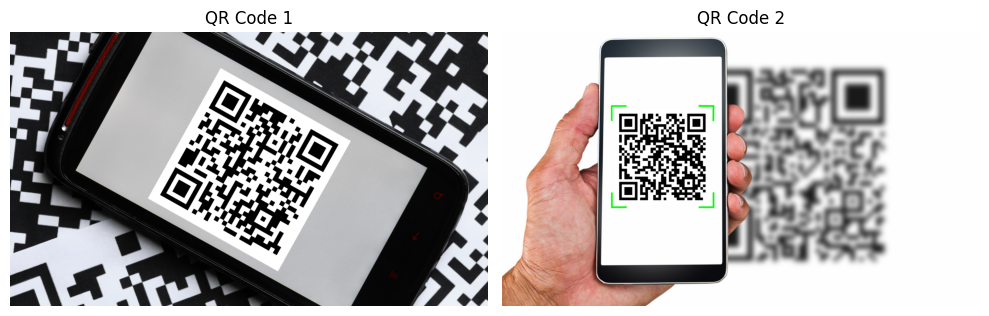

In [2]:
# Path ke folder data dan file gambar
image_path1 = os.path.join('data', 'qr1.png')
image_path2 = os.path.join('data', 'qr2.png')

# Memuat gambar
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Plot kedua gambar
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0].set_title('QR Code 1')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1].set_title('QR Code 2')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### **Membaca QR Code**

In [3]:
# Deteksi dan baca QR code menggunakan pyzbar
decoded_qr1 = decode(image1)
print (decoded_qr1)

[Decoded(data=b'https://mctm.web.id/course/', type='QRCODE', rect=Rect(left=589, top=192, width=705, height=705), polygon=[Point(x=589, y=644), Point(x=1041, y=897), Point(x=1294, y=445), Point(x=841, y=192)], quality=1, orientation='UP')]


In [4]:
# Deteksi menggunakan cv2
qr_detector = cv2.QRCodeDetector()

# Detect and decode the QR code
qr_data, points, _ = qr_detector.detectAndDecode(image1)

# Print the decoded data and points
print(f"Decoded QR Data: {qr_data}")
print(f"QR Code Points: {points}")

Decoded QR Data: 
QR Code Points: [[[ 841.78784  192.59317]
  [1292.1832   445.0876 ]
  [1040.       897.     ]
  [ 589.45557  643.1865 ]]]


### **Deteksi QR Code**

Decoded Data: https://www.youtube.com/watch?v=FbR9Xr0TVdY


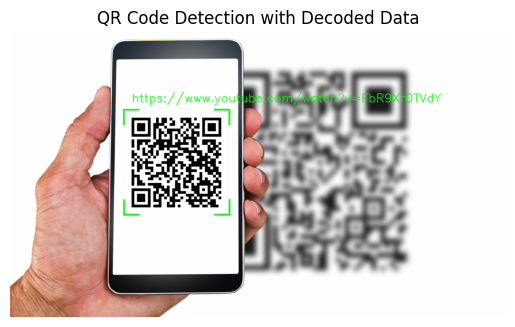

In [5]:
# Deteksi dan baca QR code menggunakan pyzbar
imagetext = image2.copy()
decoded_qr2 = decode(imagetext)

# Loop melalui hasil deteksi
for obj in decoded_qr2:
    points = obj.polygon
    if len(points) == 4:
        pts = np.array([[p.x, p.y] for p in points], dtype=np.int32)
        cv2.polylines(image2, [pts], isClosed=True, color=(0, 255, 0), thickness=3)

    # Data yang didekodekan
    qr_data = obj.data.decode('utf-8')
    print(f"Decoded Data: {qr_data}")

    x, y = obj.rect.left, obj.rect.top
    cv2.putText(imagetext, qr_data, (x, y - 60), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)

# Tampilkan gambar dengan hasil pembacaan
plt.imshow(cv2.cvtColor(imagetext, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('QR Code Detection with Decoded Data')
plt.show()

In [6]:
# Menggunakan kamera secara real-time
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Kamera tidak bisa dibuka")
else:
    print("Pencet 'ESC' atau 'q' untuk keluar.")

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        print("Error: Gagal mengambil frame kamera.")
        break

    # Decode QR code
    decoded_qrs = decode(frame)

    for obj in decoded_qrs:
        points = obj.polygon
        if len(points) == 4:
            pts = np.array([[p.x, p.y] for p in points], dtype=np.int32)
            cv2.polylines(frame, [pts], isClosed=True, color=(0, 255, 0), thickness=3)

        # Data yang didekodekan
        qr_data = obj.data.decode('utf-8')
        print(f"Decoded Data: {qr_data}")

        x, y = obj.rect.left, obj.rect.top
        cv2.putText(frame, qr_data, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Tampilkan hasil
    cv2.imshow('QR Code Detection', frame)

    # Exit on 'ESC' or 'q'
    key = cv2.waitKey(1) & 0xFF
    if key == 27 or key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Pencet 'ESC' atau 'q' untuk keluar.


> **Pertanyaan:** Bagaimana jika untuk mendeteksi Barcode?

Tipe: EAN13, Data: 9786347013767


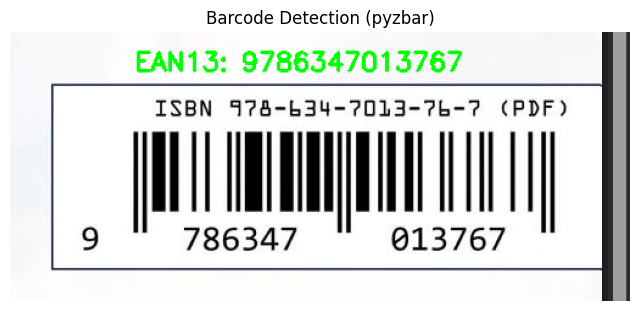

In [6]:
# Path gambar di folder data
image_path = os.path.join("data", "barcode.png")

# Pastikan file ada
if not os.path.exists(image_path):
    print(f"Error: File tidak ditemukan di {image_path}")
    exit()

# Baca gambar
image = cv2.imread(image_path)
if image is None:
    print("Error: Gagal membaca gambar.")
    exit()

# Decode barcode / QR code
decoded_objects = decode(image)

if not decoded_objects:
    print("Tidak ada barcode atau QR code terdeteksi.")
else:
    for obj in decoded_objects:
        # Titik-titik posisi barcode
        points = obj.polygon
        if len(points) == 4:
            pts = np.array([[p.x, p.y] for p in points], dtype=np.int32)
            cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

        # Data dan tipe barcode
        barcode_data = obj.data.decode('utf-8')
        barcode_type = obj.type
        print(f"Tipe: {barcode_type}, Data: {barcode_data}")

        # Tambahkan teks di atas barcode
        x, y = obj.rect.left, obj.rect.top
        cv2.putText(image, f"{barcode_type}: {barcode_data}", (x, y - 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Konversi BGR → RGB agar warna tampil benar di matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tampilkan dengan plt
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Barcode Detection (pyzbar)")
plt.show()


## **Landmark Wajah**

Landmark wajah adalah teknik untuk mengenali titik-titik penting pada wajah, seperti mata, hidung, bibir, dan rahang, biasanya berjumlah 68 titik atau lebih tergantung model. Deteksi ini dapat dilakukan menggunakan berbagai library seperti `Dlib`, `MediaPipe`, atau `OpenCV`, dan sering digunakan untuk analisis ekspresi, pelacakan wajah, atau efek augmented reality.

Setiap library memiliki jumlah dan posisi landmark wajah yang berbeda tergantung model yang digunakan:
1. `Dlib` → biasanya mendeteksi 68 landmark, mencakup detail rahang, mata, hidung, dan bibir
2. `MediaPipe` → jauh lebih detail, memiliki 468 titik (3D), cocok untuk aplikasi AR dan pelacakan ekspresi wajah secara real-time.
3. `OpenCV` → tidak punya deteksi landmark bawaan, tetapi bisa menggunakan model eksternal (seperti lbfmodel.yaml dari modul face OpenCV-contrib)

### **Membaca Landmark Wajah Menggunakan MediaPipe**

In [3]:
import mediapipe as mp

# Inisialisasi komponen MediaPipe
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# Setup FaceMesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Setup kamera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Kamera tidak bisa dibuka")
    exit()

print("Tekan 'q' untuk keluar")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Konversi warna ke RGB
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb)
    h, w, _ = frame.shape

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Gambar koneksi antar titik (face mesh)
            mp_drawing.draw_landmarks(
                image=frame,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing.DrawingSpec(
                    color=(0, 255, 0), thickness=1, circle_radius=1)
            )

            # Tambahkan nomor ID di setiap landmark
            for idx, lm in enumerate(face_landmarks.landmark):
                x, y = int(lm.x * w), int(lm.y * h)
                cv2.putText(frame, str(idx), (x, y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 0, 0), 1, cv2.LINE_AA)

    cv2.imshow("Face Mesh dengan Nomor ID", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Tekan 'q' untuk keluar


### **Membaca Landmark Wajah Menggunakan dlib**

In [4]:
import urllib.request

# 1. Persiapan Model 
# Path model landmark Dlib
predictor_path = os.path.join(os.getcwd(), 'shape_predictor_68_face_landmarks.dat')

# URL model Dlib resmi (68 landmark)
predictor_url = "https://github.com/davisking/dlib-models/raw/master/shape_predictor_68_face_landmarks.dat.bz2"

# Cek apakah model sudah ada
if not os.path.exists(predictor_path):
    print("Model landmark belum ada. Mengunduh dari GitHub...")
    compressed_path = predictor_path + ".bz2"
    urllib.request.urlretrieve(predictor_url, compressed_path)
    print("Ekstraksi file model...")
    import bz2
    with bz2.open(compressed_path, 'rb') as f_in, open(predictor_path, 'wb') as f_out:
        f_out.write(f_in.read())
    os.remove(compressed_path)
    print("Model berhasil diunduh dan diekstrak.")
else:
    print("Model landmark sudah tersedia di root directory.")

Model landmark sudah tersedia di root directory.


In [5]:
# Inisialisasi detektor wajah dan prediktor landmark
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Buka kamera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Kamera tidak bisa dibuka")
    exit()

print("Tekan 'q' untuk keluar")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Gagal mengambil frame kamera.")
        break

    # Konversi ke grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah
    faces = detector(gray)

    for (i, face) in enumerate(faces):
        # Prediksi landmark wajah
        shape = predictor(gray, face)
        landmarks = np.array([[shape.part(j).x, shape.part(j).y] for j in range(68)])

        # Gambar titik dan nomor indeks
        for idx, (lx, ly) in enumerate(landmarks):
            cv2.circle(frame, (lx, ly), 1, (255, 0, 0), -1)
            cv2.putText(frame, str(idx), (lx + 2, ly - 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.25, (255, 255, 0), 1, cv2.LINE_AA)

    # Tampilkan hasil
    cv2.imshow("Face Landmark (Dlib Style)", frame)

    # Keluar jika tekan 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Tekan 'q' untuk keluar


## **Image Overlay Ke Wajah**

In [6]:
# 2. Real-time Detection

# Path gambar kacamata
glasses_path = os.path.join('data', 'glasses.png')

# Load gambar kacamata
glasses = cv2.imread(glasses_path, cv2.IMREAD_UNCHANGED)

# Inisialisasi detektor dan prediktor wajah
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Kamera tidak bisa dibuka")
    exit()

print("Tekan 'q' untuk keluar")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        # Ambil dua titik mata (kiri: 36, kanan: 45)
        landmarks = predictor(gray, face)
        left_eye = np.array([landmarks.part(36).x, landmarks.part(36).y])
        right_eye = np.array([landmarks.part(45).x, landmarks.part(45).y])

        # Hitung ukuran dan posisi
        eye_distance = np.linalg.norm(right_eye - left_eye)
        glasses_width = int(2 * eye_distance)
        glasses_height = int(glasses.shape[0] * (glasses_width / glasses.shape[1]))
        eye_center = np.mean([left_eye, right_eye], axis=0).astype(int)

        x1 = int(eye_center[0] - glasses_width / 2)
        y1 = int(eye_center[1] - glasses_height / 2)
        x2, y2 = x1 + glasses_width, y1 + glasses_height

        # Cegah keluar frame
        if x1 < 0 or y1 < 0 or x2 > frame.shape[1] or y2 > frame.shape[0]:
            continue

        # Resize kacamata
        resized_glasses = cv2.resize(glasses, (glasses_width, glasses_height), interpolation=cv2.INTER_AREA)

        # Cek jumlah channel (3 = BGR, 4 = BGRA)
        if resized_glasses.shape[2] == 4:
            b, g, r, a = cv2.split(resized_glasses)
            overlay_color = cv2.merge((b, g, r))
            alpha_mask = (a / 255.0)[..., None]  # (H, W, 1)
            roi = frame[y1:y2, x1:x2]
            frame[y1:y2, x1:x2] = (alpha_mask * overlay_color + (1 - alpha_mask) * roi).astype(np.uint8)
        else:
            frame[y1:y2, x1:x2] = cv2.resize(resized_glasses, (glasses_width, glasses_height))

    cv2.imshow("Face Filter: Glasses", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Tekan 'q' untuk keluar


In [7]:
import cv2
import dlib
import numpy as np
import os

# Path model & gambar lipstick
predictor_path = os.path.join("shape_predictor_68_face_landmarks.dat")
lipstick_path = os.path.join('data', 'lipstick.png')

# Load detektor & prediktor wajah
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

# Load gambar lipstick (dengan alpha transparansi)
lipstick = cv2.imread(lipstick_path, cv2.IMREAD_UNCHANGED)
if lipstick is None:
    print("Error: Gambar lipstick tidak ditemukan di", lipstick_path)
    exit()

# Baca alpha mask kalau ada
if lipstick.shape[2] == 4:
    b, g, r, a = cv2.split(lipstick)
    lipstick_rgb = cv2.merge((b, g, r))
    alpha = a / 255.0
else:
    lipstick_rgb = lipstick
    alpha = np.ones(lipstick.shape[:2], dtype=float)

# Kamera
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Kamera tidak bisa dibuka")
    exit()

print("Tekan 'q' untuk keluar")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Titik bibir kiri (48) dan kanan (54)
        left_lip = np.array([landmarks.part(48).x, landmarks.part(48).y])
        right_lip = np.array([landmarks.part(54).x, landmarks.part(54).y])
        top_lip = np.array([landmarks.part(51).x, landmarks.part(51).y])
        bottom_lip = np.array([landmarks.part(57).x, landmarks.part(57).y])

        # Hitung ukuran lipstick
        lip_width = int(np.linalg.norm(right_lip - left_lip) * 1.6)
        lip_height = int(np.linalg.norm(top_lip - bottom_lip) * 3.0) 

        # Posisi tengah bibir
        lip_center = np.mean([top_lip, bottom_lip], axis=0).astype(int)

        # Tentukan area
        x1 = int(lip_center[0] - lip_width / 2)
        y1 = int(lip_center[1] - lip_height / 2)
        x2 = x1 + lip_width
        y2 = y1 + lip_height

        # Cegah keluar frame
        if x1 < 0 or y1 < 0 or x2 > frame.shape[1] or y2 > frame.shape[0]:
            continue

        # Resize lipstick dan alpha
        resized_lipstick = cv2.resize(lipstick_rgb, (lip_width, lip_height))
        resized_alpha = cv2.resize(alpha, (lip_width, lip_height))[:, :, None]

        roi = frame[y1:y2, x1:x2]

        # Blend dengan alpha transparansi
        blended = (resized_alpha * resized_lipstick + (1 - resized_alpha) * roi).astype(np.uint8)
        frame[y1:y2, x1:x2] = blended

    cv2.imshow("Face Filter: Lipstick", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Tekan 'q' untuk keluar
